# ESRB Rating Project

## Table Of Contents
<font size=3rem>
    
0 -**[ INTRO](#INTRODUCTION)<br>**
1 -**[ OBTAIN](#OBTAIN)**<br>
2 -**[ SCRUB](#SCRUB)**<br>
3 -**[ EXPLORE](#EXPLORE)**<br>
4 -**[ MODEL](#MODEL)**<br>
5 -**[ INTERPRET](#INTERPRET)**<br>
6 -**[ CONCLUSIONS & RECCOMENDATIONS](#Conclusions-&-Recommendations)<br>**
</font>
___

# INTRODUCTION

- Student: Cody Freese
- Pace: Part Time
- Amber Yandow

In this notebook we will analyze ESRB Ratings and develop a model for predicting these ratings.

What is ESRB and what are the various Categories?
ESRB stands for Entertainment Software Rating Board. It is an American regulatory organization for assigning content ratings to consumer Video games. It was established in 1994 in response to criticism of contoversial video games like mortal Kombat "Fatality". ESRB has the following labels:

RP = Ratings Pending (1994-present) This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB.

EC = Early Childhood (1994-2018) Games with this rating contain content which is aimed towards a preschool audience. They do not contain content that parents would find objectionable to this audience.No longer used as of 2018 due to few titles using this, and all titles with this rating are replaced with the E rating.

E = Everyone (1994-present) Games with this rating contain content which the ESRB believes is "generally suitable for all ages".They can contain content such as infrequent use of "mild"/cartoon violence and mild language.This rating was known as Kids to Adults (K-A) until 1998, when it was renamed "Everyone".

E10+ = Everyone 10+ (2005-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 10 years and older. They can contain content with an impact higher than the "Everyone" rating can accommodate, but still not as high as to warrant a "Teen" rating, such as a larger amount of violence, mild language, crude humor, or suggestive content.

T = Teen (1994-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 13 years and older; they can contain content such as moderate amounts of violence (including small amounts of blood), mild to moderate use of language or suggestive themes, sexual content, partial nudity and crude humor.

M17+ = Mature 17+ (1994-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 17 years and older; they can contain content with an impact higher than the "Teen" rating can accommodate, such as intense and/or realistic portrayals of violence (including blood, gore, mutilation, and depictions of death), strong sexual themes and content, nudity, and more frequent use of strong language.

A => Adults (1994-present) Games with this rating contain content which the ESRB believes is only suitable for those aged 18 years and older; they contain content with an impact higher than the "Mature" rating can accommodate, such as graphic sexual themes and content, extreme portrayals of violence, or unsimulated gambling with real currency. The majority of AO-rated titles are pornographic adult video games; the ESRB has seldom issued the AO rating solely for violence.

## Import Tools

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import statsmodels as sm

import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA

from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,
                              BaggingClassifier,StackingClassifier,RandomForestRegressor)


from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [94]:
pd.set_option('display.max_columns', None)

In [95]:
def set_frameon(self, b):
        self.patch.set_visible(b)
        self.stale = True

In [96]:
#Classifier Performance Visual
def visual(trueVals, predictedVals, classifierName):
    plt.figure(figsize=(7, 7))
    plt.scatter(trueVals, predictedVals, color = 'green')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    
    acc = accuracy_score(trueVals, predictedVals)
    
    plt.title('performance of ' + str(classifierName) + 'Accuracy %:' + str(acc*100))
    plt.plot([0,1,2,3], [0,1,2,3], color = 'blue')
    plt.show()  

In [97]:
#Classification Function
def classification(X_train, y_train,X_test,y_test, classifier):
    y_pred = classifier.predict(X_test)
    fig, ax = plt.subplots(figsize=(8,8))
    plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test, ax=ax)
    plt.show()
    print(classification_report(y_test, y_pred))
    print(f'Accuracy:{round(accuracy_score(y_test,y_pred)*100, 2)}%')

In [98]:
# Label Distribution Function
def ratingplot(dataFrame, featureName, setName):
    uniqueVals = set(dataFrame[featureName])
    countArr =  []
    
    for mem in uniqueVals:
        countArr.append(len(dataFrame[dataFrame[featureName] == mem]))
    
    plt.figure(figsize=(17, 5))
    plt.subplot(1,2,1)
    plt.bar(list(uniqueVals), countArr, color = 'blue')
    plt.title(str(setName))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.pie(countArr, labels = list(uniqueVals),autopct='%1.2f%%')
    plt.title(str(setName))
    plt.show()

# OBTAIN

In [99]:
# Import/Read
test_df = pd.read_csv('test_esrb.csv')
test_df.info()

train_df = pd.read_csv('Video_games_esrb_rating.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [100]:
#Combine the Train/Test CSVs into one
combined_csv = test_df.append(train_df)
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

# SCRUB

- Datatypes appear correct

## Pivot Table, Describe & Counts

In [101]:
#Organized table by Rating and Console
combined_csv.pivot_table(index=["esrb_rating","console"])

alcohol_reference  animated_blood     blood  \
esrb_rating console                                                
E           0                 0.035857        0.000000  0.000000   
            1                 0.033962        0.000000  0.000000   
ET          0                 0.129747        0.006329  0.000000   
            1                 0.061033        0.037559  0.000000   
M           0                 0.000000        0.000000  0.436275   
            1                 0.003663        0.000000  0.388278   
T           0                 0.039916        0.010504  0.430672   
            1                 0.073048        0.012594  0.387909   

                     blood_and_gore  cartoon_violence  crude_humor  \
esrb_rating console                                                  
E           0              0.000000          0.000000     0.003984   
            1              0.000000          0.000000     0.007547   
ET          0              0.000000          0.006329     0.069620   
            1              0.000000          0.117371     0.061033   
M           0              0.406863          0.000000     0.029412   
            1              0.578755          0.000000     0.003663   
T           0              0.084034          0.010504     0.048319   
            1              0.060453          0.040302     0.138539   

                     drug_reference  fantasy_violence  intense_violence  \
esrb_rating console                                                       
E           0              0.000000          0.000000          0.000000   
            1              0.000000          0.000000          0.000000   
ET          0              0.012658          0.715190          0.085443   
            1              0.037559          0.582160          0.084507   
M           0              0.053922          0.117647          0.186275   
            1              0.069597          0.095238          0.315018   
T           0              0.056723          0.222689          0.132353   
            1              0.032746          0.113350          0.075567   

                     language    lyrics  mature_humor  mild_blood  \
esrb_rating console                                                 
E           0        0.000000  0.000000      0.000000    0.000000   
            1        0.000000  0.000000      0.000000    0.003774   
ET          0        0.072785  0.022152      0.009494    0.145570   
            1        0.070423  0.018779      0.004695    0.093897   
M           0        0.161765  0.063725      0.004902    0.024510   
            1        0.172161  0.069597      0.007326    0.021978   
T           0        0.195378  0.037815      0.027311    0.105042   
            1        0.148615  0.055416      0.005038    0.110831   

                     mild_cartoon_violence  mild_fantasy_violence  \
esrb_rating console                                                 
E           0                     0.031873               0.258964   
            1                     0.056604               0.139623   
ET          0                     0.025316               0.022152   
            1                     0.032864               0.028169   
M           0                     0.004902               0.004902   
            1                     0.000000               0.003663   
T           0                     0.014706               0.000000   
            1                     0.012594               0.007557   

                     mild_language  mild_lyrics  mild_suggestive_themes  \
esrb_rating console                                                       
E           0             0.051793     0.051793                0.000000   
            1             0.052830     0.052830                0.000000   
ET          0             0.037975     0.104430                0.072785   
            1             0.014085     0.112676                0.075117   
M           0             0.000000     0.000000         

In [102]:
#Checking values
combined_csv.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000
mean,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,0.109395,0.112735,0.034656,0.009186,0.071816,0.021294,0.050104,0.028392,0.074322,0.043424,0.043424,0.158246,0.016284,0.022547,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823
std,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,0.312199,0.316334,0.182944,0.095421,0.258237,0.144394,0.218206,0.166126,0.262348,0.203852,0.203852,0.365048,0.126592,0.148485,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [103]:
#Get a count of possible duplicate titles Yes/No
for column in combined_csv:
    print(combined_csv[column].value_counts())

Revenant Saga                    2
Super GunWorld 2                 2
Fortnite                         2
Serial Cleaner                   2
The Girl and the Robot           2
                                ..
Lumines Remastered               1
Evasion                          1
Ninjin: Clash of Carrots         1
Iconoclasts                      1
ACA NEOGEO FATAL FURY SPECIAL    1
Name: title, Length: 2332, dtype: int64
0    1247
1    1148
Name: console, dtype: int64
0    2274
1     121
Name: alcohol_reference, dtype: int64
0    2375
1      20
Name: animated_blood, dtype: int64
0    1841
1     554
Name: blood, dtype: int64
0    2090
1     305
Name: blood_and_gore, dtype: int64
0    2347
1      48
Name: cartoon_violence, dtype: int64
0    2272
1     123
Name: crude_humor, dtype: int64
0    2313
1      82
Name: drug_reference, dtype: int64
0    1844
1     551
Name: fantasy_violence, dtype: int64
0    2133
1     262
Name: intense_violence, dtype: int64
0    2125
1     270
Name: language,

In [104]:
pd.DataFrame(combined_csv["title"].value_counts()[combined_csv["title"].value_counts() > 1]).index
#Duplicate Titles across platforms

Index(['Revenant Saga', 'Super GunWorld 2', 'Fortnite', 'Serial Cleaner',
       'The Girl and the Robot', 'Jak II', 'ADK DAMASHII', 'Crawl',
       'Windjammers', 'INSIDE', 'Jak X: Combat Racing', 'Polybius', 'SHINY',
       'Kero Blaster', 'Island Flight Simulator', 'Transport Giant', 'ICEY',
       'BUTCHER', 'The Metronomicon: Slay the Dance Floor',
       'South Park: The Stick of Truth', 'Thimbleweed Park', 'Pineview Drive',
       'Momodora: Reverie Under the Moonlight', 'The Inner World',
       'Paranormal Activity: The Lost Soul', '3D MiniGolf',
       'Cosmic Star Heroine', 'Wonder Boy: The Dragon's Trap',
       'Hellblade: Senua's Sacrifice', 'Still Time', 'Aaero',
       'Surf World Series', 'The Long Dark', 'Double Dragon 4', 'Jak 3',
       '88 Heroes', 'BLACKHOLE: Complete Edition', 'Lethal League',
       'Destiny 2', 'River City Melee: Battle Royal Special', 'Joe's Diner',
       'forma.8', 'Night Trap - 25th Anniversary Edition', 'Nex Machina',
       'Duck Game', '

In [105]:
len(pd.DataFrame(combined_csv["title"].value_counts()[combined_csv["title"].value_counts() > 1]).index)

63

In [106]:
# 63 games that exist on both platforms but my function doens't catch

In [107]:
combined_csv[combined_csv['title']=="South Park: The Stick of Truth"]
#Variables don't match for the same game/sometimes same console

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
16,South Park: The Stick of Truth,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,M
1514,South Park: The Stick of Truth,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,M


# EXPLORE

## EDA by Platform

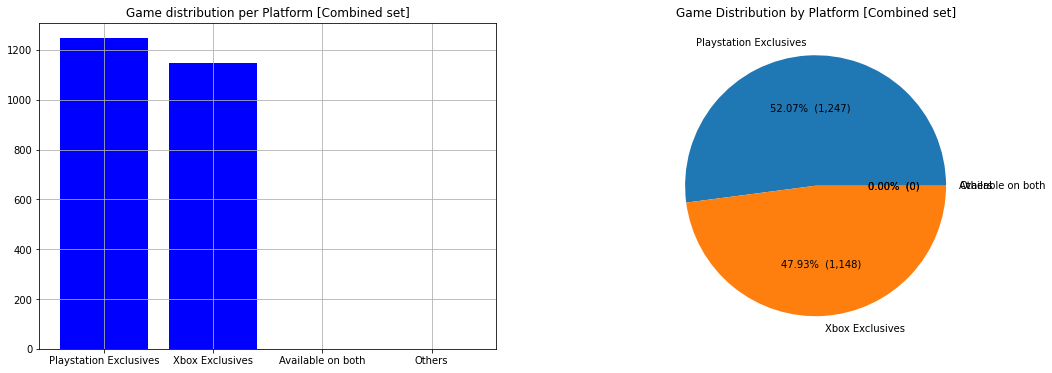

In [169]:
# Plotting distribution of gaming platforms (Combined set)

psExclusives = len(combined_csv[ combined_csv['console'] == 0 ])
xboxExclusives = len(combined_csv[ combined_csv['console'] == 1 ])
availableOnBoth = len(combined_csv[ combined_csv['console'] == 2 ])
other =len(combined_csv[ combined_csv['console'] == 3 ])

nameList = ['Playstation Exclusives', 'Xbox Exclusives', 'Available on both', 'Others']
nameValues = [psExclusives, xboxExclusives, availableOnBoth, other]

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.bar(nameList, nameValues, color = 'blue')
plt.title('Game distribution per Platform [Combined set]')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.pie(nameValues, labels=nameList, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(nameValues)/100))
plt.title('Game Distribution by Platform [Combined set]')
plt.show()

### EDA Platform Summary
- Appears to show no games available on both, however we do see later that 63 titles are shared between both.
- Function needs fixing

## EDA by Rating

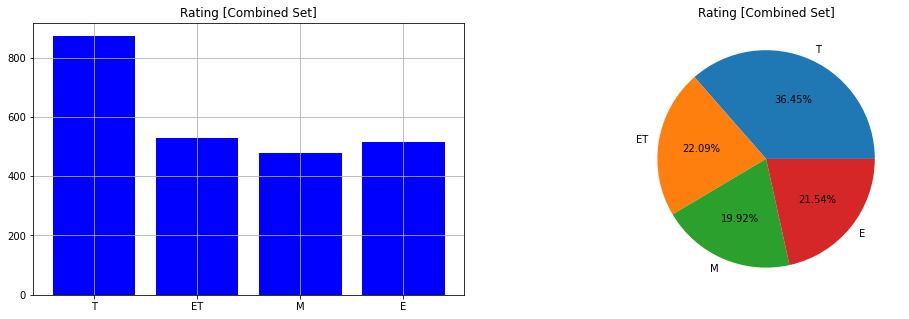

In [109]:
ratingplot(combined_csv, 'esrb_rating', 'Rating [Combined Set]')

### EDA Rating Summary
- 4 Ratings Present
    - Everyone
    - Everyone 10+
    - Teen
    - Mature

## Correlation

In [110]:
# One Hot Encoding Ratings
mapp = { 'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3,}

combined_csv['esrb_rating'] = combined_csv['esrb_rating'].map(mapp)

In [111]:
subjective_corr = combined_csv.corr()
subjective_corr[np.abs(subjective_corr)<.2]=0
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

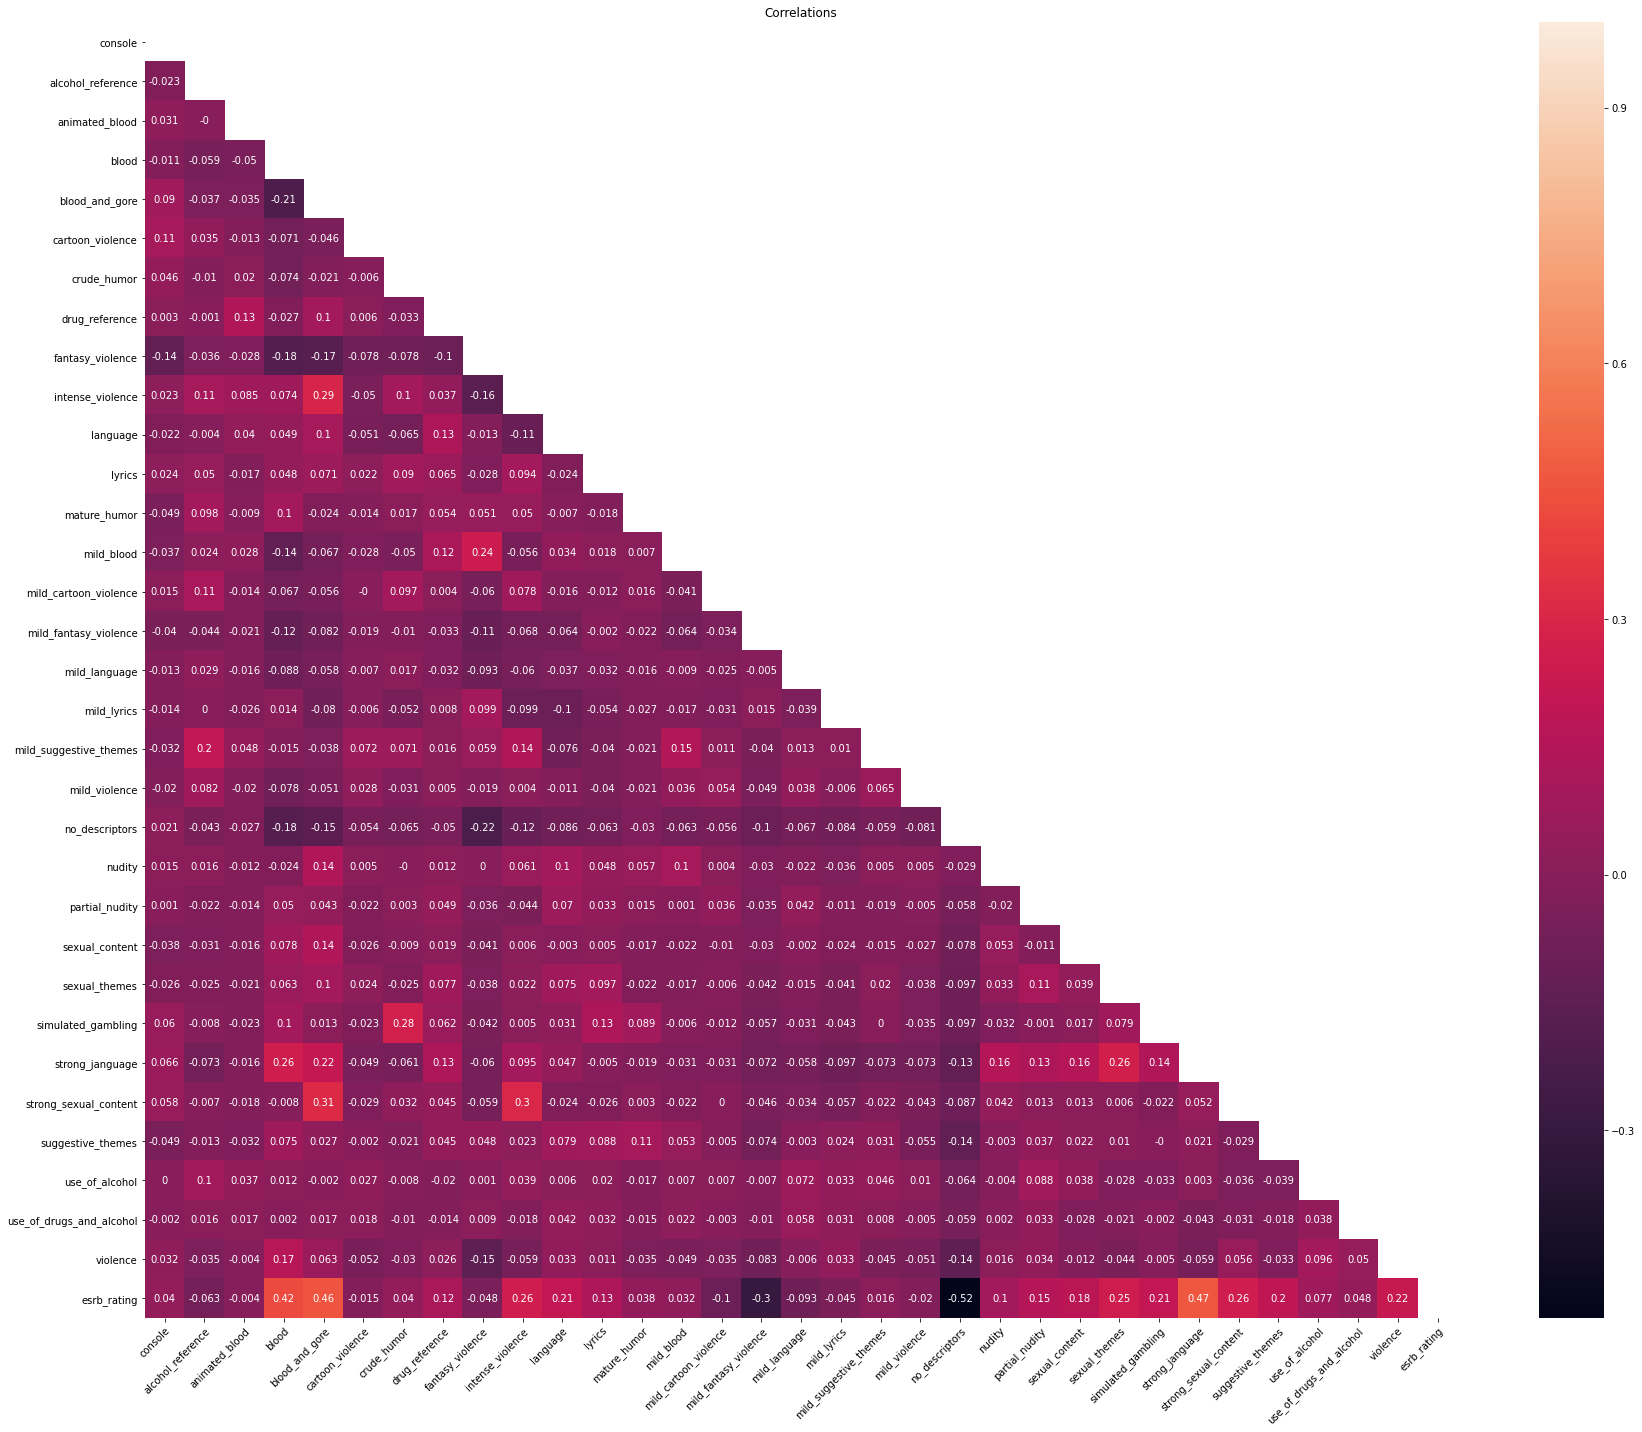

In [112]:
fig, ax = plt.subplots(figsize=(25,20))
corr = combined_csv.corr().round(3)
sb.heatmap(corr, annot=True,ax=ax, mask=mask)
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor")
ax.set_title('Correlations')
set_frameon(ax, True)
fig.tight_layout()

- Strongest Correlations with ESRB

    -1st Line (Most impactful)
        - 0.40-1.00
            - Blood
            - Blood & Gore
            - No Descriptors (Strongest)
            - Strong Language
    - 2nd Line
        - 0.20-0.39
            - Intense Violence
            - Language
            - Mild Fantasy Violence
            - Sexual Themes
            - Simulated Gambling
            - Strong Sexual Content
            - Suggestive Themes
            - Violence
    -3rd Line
        - 0.00-0.19
            -Remaining Variables

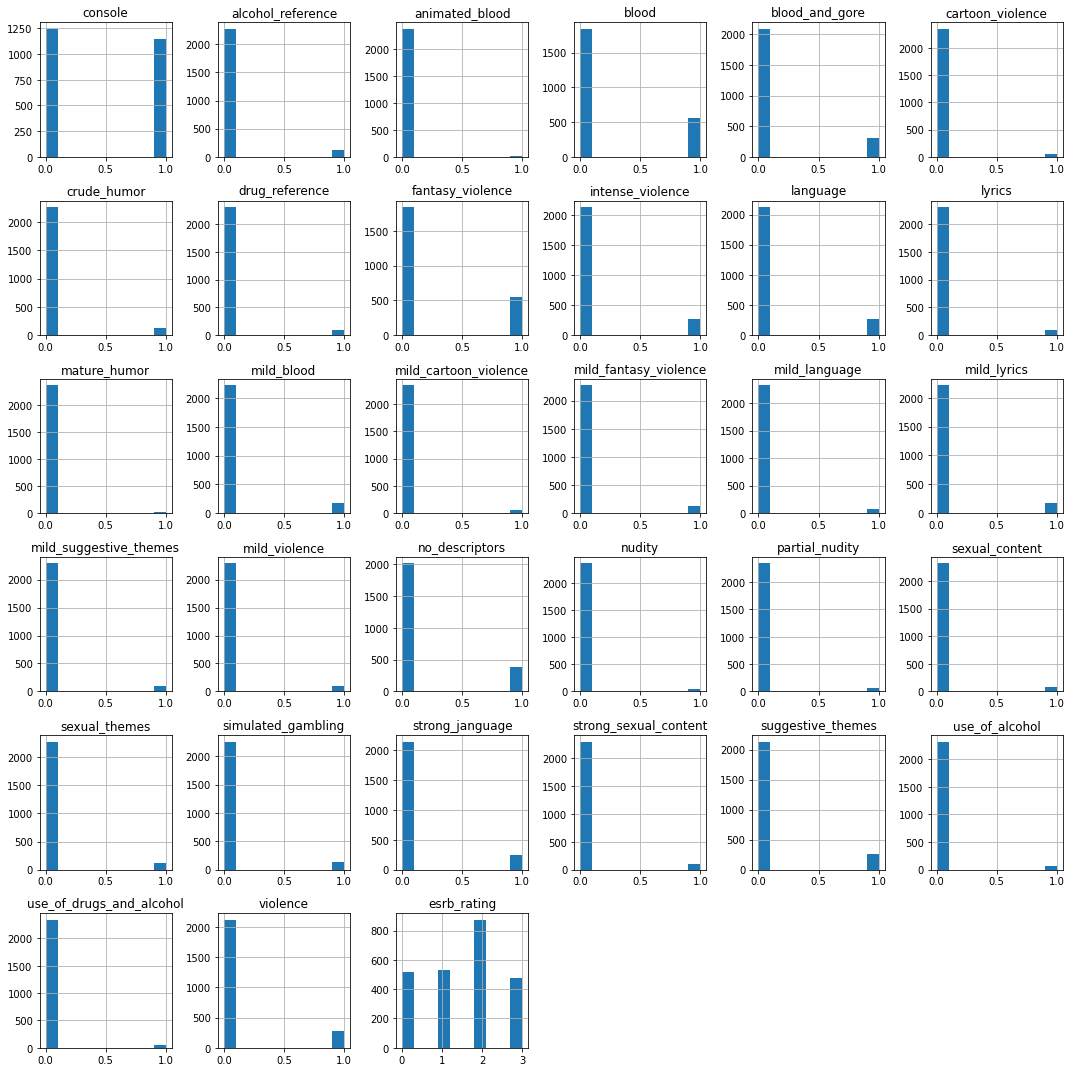

In [113]:
combined_csv.hist(figsize=(15,15))
plt.tight_layout()

# MODEL

## Evalution Metrics

- Ratings

- F1/Recall should be the most important metrics as       you descend the rating ladder. This mainly because you don't want games that may have Mature or Teen related content to be released to a rating of E so that children or young teenagers outside the ESRB's recommended ratings do not get exposed to such content.

- As the rating increases the overall metrics (for this dataset) show precisely how as more content gets added to a game increasing its rating, the lower recall, f1 and precision weigh on those ratings. If this dataset contained Ao (Adults Only) rating game content, that is when you'd want to put more emphasis on those same metrics again. You don't want a pornographic scene in a video game that would normally get rated Ao to get a rating of M. While the blowback would not be as bad as a Mature content ratred game recieving an E, it would still be bad. 

- TL:DR - You want stringent checking of the ratings for younger audiences, as those ratings increase with age the less importance is put on catching features and content associated with those ratings

## Train Test Split

In [114]:
#Train Test Split
X = combined_csv.drop(['esrb_rating', 'title'],1)

y = combined_csv[['esrb_rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 354681)

## Initial Model

### Decision Tree

In [115]:
#Fit decision tree, initial classifier, no parameters
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
#Initial dtc training score
dtc.score(X_train, y_train)

0.931980906921241

In [117]:
#Initial dtc test score
dtc.score(X_test, y_te)

NameError: name 'y_te' is not defined

In [ ]:
y_preds = dtc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

In [ ]:
#Confusion matrix, initial dtc classifier
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=dtc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

### KNN

In [ ]:
##Fit knn initial classifier, no parameters
knn = KNeighborsClassifier()

In [ ]:
#Confusion matrix, initial knn classifier
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=knn)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

### Random Forest

In [ ]:
##Fit random forest initial classifier, no parameters
rfc = RandomForestClassifier()

In [ ]:
#Confusion matrix, initial rfc classifier
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=rfc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

- DTC              precision    recall  f1-score   support

           0       0.93      0.97      0.95       161
           1       0.78      0.87      0.82       155
           2       0.87      0.79      0.82       271
           3       0.87      0.87      0.87       132
           
           
- KNN              precision    recall  f1-score   support

           0       0.85      0.98      0.91       161
           1       0.69      0.77      0.73       155
           2       0.80      0.70      0.75       271
           3       0.89      0.83      0.86       132
           
- RFC              precision    recall  f1-score   support

           0       0.91      0.97      0.94       161
           1       0.77      0.82      0.79       155
           2       0.86      0.78      0.82       271
           3       0.88      0.90      0.89       132

- While all the models appear to perform well in the training set, lets see how it works further refined and applied to the test set

# 1st Refined Models

### Decision Tree Refined Model

In [118]:
##Fit decision tree, applying parameters to refine search
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [119]:
#GridSearchCV on DTC
dtc_grid_search = GridSearchCV(dtc, dtc_param_grid, cv=3, return_train_score=True)

dtc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [120]:
#Search for best estimator
bestdtc = dtc_grid_search.best_estimator_

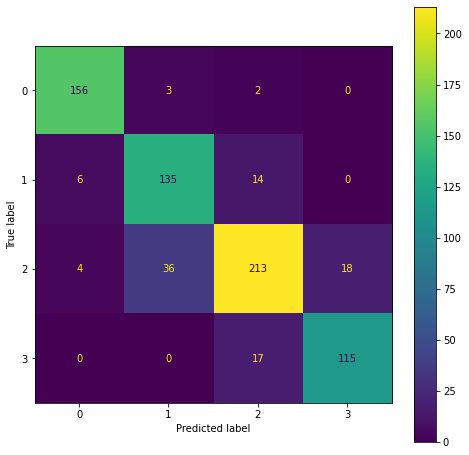

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       161
           1       0.78      0.87      0.82       155
           2       0.87      0.79      0.82       271
           3       0.86      0.87      0.87       132

    accuracy                           0.86       719
   macro avg       0.86      0.87      0.87       719
weighted avg       0.86      0.86      0.86       719

Accuracy:86.09%


In [121]:
#Confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestdtc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [122]:
#search for best parameters
dtc_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [123]:
bestdtc.score(X_test,y_test)

0.8609179415855355

In [124]:
bestdtc.score(X_train,y_train)

0.931980906921241

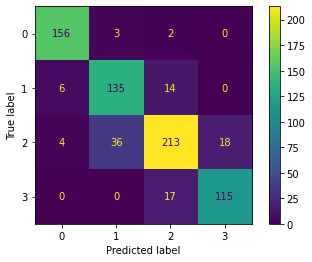

In [125]:
plot_confusion_matrix(estimator=bestdtc, X=X_test, y_true=y_test)

- While DTC model appears to predict E ratings, it fails to catch 80 games that should be rated M and allow them to fall into Everyone rating
- Model appears especially bad at catching Mature content specifically

### KNN Refined Model

In [126]:
#Fit knn, applying parameters to refine search
knn_param_grid = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute'],
    'p':[1,2,3]
}

In [127]:
#GridSearch on Knn
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [128]:
#best estimator
bestknn = knn_grid_search.best_estimator_

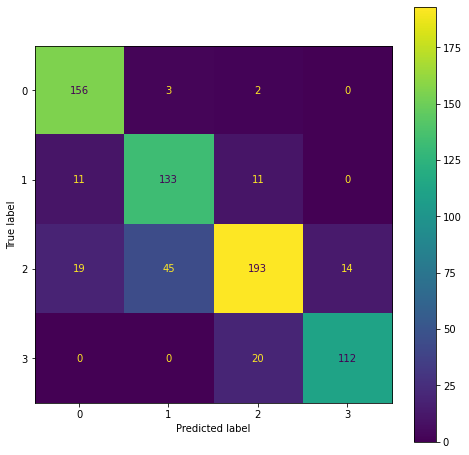

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       161
           1       0.73      0.86      0.79       155
           2       0.85      0.71      0.78       271
           3       0.89      0.85      0.87       132

    accuracy                           0.83       719
   macro avg       0.83      0.85      0.83       719
weighted avg       0.83      0.83      0.82       719

Accuracy:82.61%


In [129]:
#Knn confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestknn)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [130]:
#search for best parameters
knn_grid_search.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [131]:
#knn model test score
bestknn.score(X_test,y_test)

0.8261474269819193

In [132]:
#knn model training score
bestknn.score(X_train,y_train)

0.9301909307875895

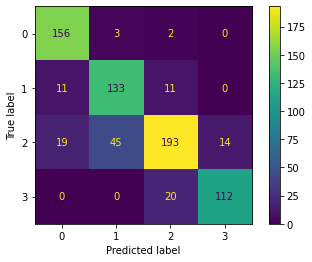

In [133]:
#confusion matrix results for trained data against test
plot_confusion_matrix(estimator=bestknn, X=X_test, y_true=y_test)

- While KNN model appears to predict E ratings, it fails to catch 80 games that should be rated M and allow them to fall into Everyone rating
- Model appears especially bad at catching Mature content also

### Random Forest Refined

In [134]:
##Fit random forest, applying parameters to refine search
rfc_param_grid = {
    'n_estimators': [50,100],
    'criterion': ['gini','entropy'],
    'max_depth': [None,3, 5, 7],
    'min_samples_split': [1, 2, 4, 6],
    'min_samples_leaf': [1,2,3],
    'max_features': [None,'sqrt','log2'],
    'random_state': [7],
    
}

In [135]:
#Gridsearch on rfc
rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=3,n_jobs=10, return_train_score=True)

rfc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 4, 6],
                         'n_estimators': [50, 100], 'random_state': [7]},
             return_train_score=True)

In [136]:
#best estimator
bestrfc = rfc_grid_search.best_estimator_

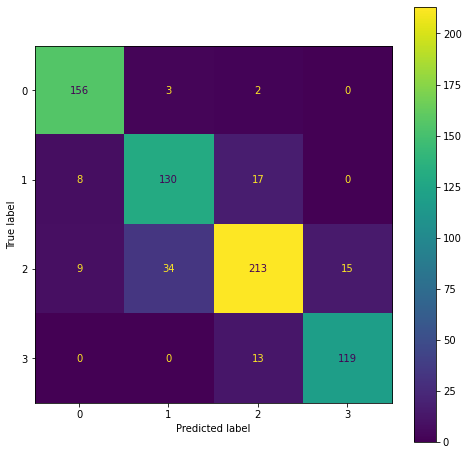

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       161
           1       0.78      0.84      0.81       155
           2       0.87      0.79      0.83       271
           3       0.89      0.90      0.89       132

    accuracy                           0.86       719
   macro avg       0.86      0.87      0.87       719
weighted avg       0.86      0.86      0.86       719

Accuracy:85.95%


In [137]:
#rfc confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestrfc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [138]:
#best parameter
rfc_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 7}

In [139]:
#rfc model test score
bestrfc.score(X_test,y_test)

0.8595271210013908

In [140]:
#rfc model training score
bestrfc.score(X_train,y_train)

0.931980906921241

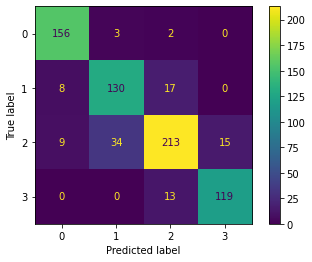

In [141]:
#confusion matrix results for trained data against test
plot_confusion_matrix(estimator=bestrfc, X=X_test, y_true=y_test)

- While RFC model appears to predict E ratings, it fails to catch 80 games that should be rated M and allow them to fall into Everyone rating
- Model appears especially bad at catching Mature content specifically

# 2nd Refined Models

### Decision Tree Refined

In [142]:
##Fit decision tree, applying parameters to refine search
dtc_para_grid = {
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

In [143]:
#Search for best estimator
bestdtc = dtc_grid_search.best_estimator_

In [144]:
#GridSearchCV on DTC
dtc_grid_search = GridSearchCV(dtc, dtc_param_grid, cv=3, return_train_score=True)

dtc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

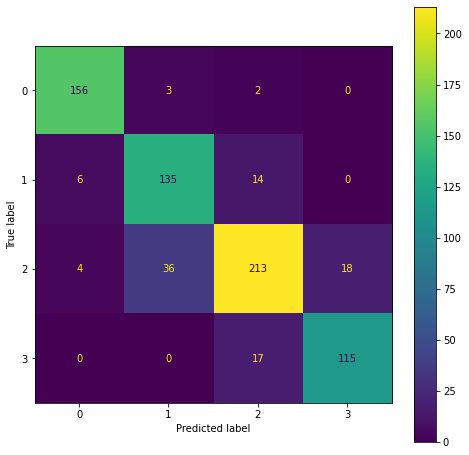

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       161
           1       0.78      0.87      0.82       155
           2       0.87      0.79      0.82       271
           3       0.86      0.87      0.87       132

    accuracy                           0.86       719
   macro avg       0.86      0.87      0.87       719
weighted avg       0.86      0.86      0.86       719

Accuracy:86.09%


In [145]:
#Confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestdtc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [146]:
#dtc model test score
bestdtc.score(X_test,y_test)

0.8609179415855355

In [147]:
#dtc model training score
bestdtc.score(X_train,y_train)

0.931980906921241

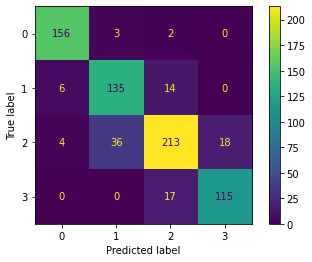

In [148]:
#confusion matrix results for trained data against test
plot_confusion_matrix(estimator=bestdtc, X=X_test, y_true=y_test)

### KNN Refined Model

In [149]:
##Fit knn, applying parameters to refine search
knn_para_grid = {
    'algorithm': 'brute',
    'n_neighbors': 5,
    'p': 1,
    'weights': 'distance'
}

In [150]:
#GridSearch on Knn
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [151]:
#Search for best estimator
bestknn = dtc_grid_search.best_estimator_

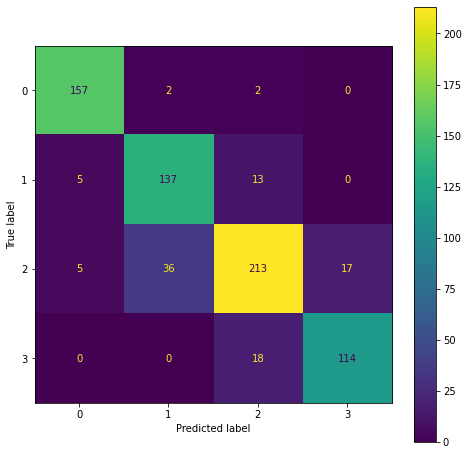

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       161
           1       0.78      0.88      0.83       155
           2       0.87      0.79      0.82       271
           3       0.87      0.86      0.87       132

    accuracy                           0.86       719
   macro avg       0.86      0.88      0.87       719
weighted avg       0.87      0.86      0.86       719

Accuracy:86.37%


In [152]:
#Knn confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestknn)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [153]:
#rfc model test score
bestrfc.score(X_test,y_test)

0.8595271210013908

In [154]:
#rfc model training score
bestrfc.score(X_train,y_train)

0.931980906921241

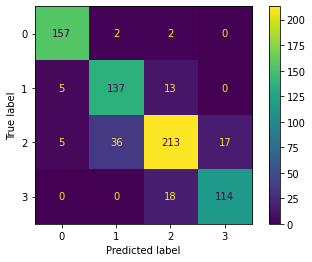

In [155]:
#confusion matrix results for trained data against test
plot_confusion_matrix(estimator=bestknn, X=X_test, y_true=y_test)

### Random Forest Refined

In [156]:
##Fit rfc, applying parameters to refine search
rfc_para_grid = {
    'criterion':'gini',
    'max_depth':None,
    'max_features':'sqrt',
    'min_samples_leaf':1,
    'min_samples_split':2,
    'n_estimators':100,
    'random_state':7
}

In [157]:
#GridSearch on rfc
rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=3,n_jobs=10, return_train_score=True)

rfc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 4, 6],
                         'n_estimators': [50, 100], 'random_state': [7]},
             return_train_score=True)

In [158]:
#best estimator
bestrfc = rfc_grid_search.best_estimator_

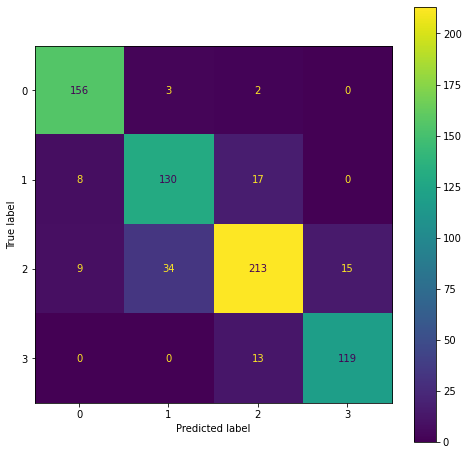

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       161
           1       0.78      0.84      0.81       155
           2       0.87      0.79      0.83       271
           3       0.89      0.90      0.89       132

    accuracy                           0.86       719
   macro avg       0.86      0.87      0.87       719
weighted avg       0.86      0.86      0.86       719

Accuracy:85.95%


In [159]:
#rfc confusion matrix
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestrfc)

- Model on training set
    - Numbers on the Bottom/Left indicate failure based off of recall metric to catch harmful content from falling into lower ESRB ratings
    - Numbers on Top/Right indicate a game receiving a stricter rating than is required, while this could impact outreach and sales, questionable content is caught from lower ratings

In [160]:
#rfc model test score
bestrfc.score(X_test,y_test)

0.8595271210013908

In [161]:
#rfc model training score
bestrfc.score(X_train,y_train)

0.931980906921241

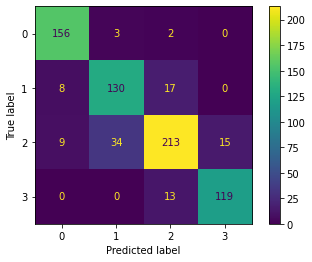

In [162]:
#confusion matrix results for trained data against test
plot_confusion_matrix(estimator=bestrfc, X=X_test, y_true=y_test)

# INTERPRET

## Decision Tree Feature Importances

In [163]:
#What features carry the most weight
dtc.feature_importances_

array([0.02415117, 0.01433789, 0.01054481, 0.05492109, 0.07054233,
       0.00710797, 0.02051952, 0.01456162, 0.10087101, 0.01643588,
       0.03178803, 0.01520026, 0.00553587, 0.02991621, 0.00051255,
       0.06633802, 0.01008702, 0.01587907, 0.0166133 , 0.0178653 ,
       0.15212641, 0.00420895, 0.00507782, 0.0079451 , 0.02176983,
       0.02440209, 0.14266418, 0.02259381, 0.02996472, 0.01511334,
       0.00431522, 0.02608962])

In [167]:
Feature_Importances=pd.DataFrame({"feature":X_train.columns,"importance":dtc.feature_importances_})
Feature_Importances.sort_values("importance")

,feature,importance
14,mild_cartoon_violence,0.000513
21,nudity,0.004209
30,use_of_drugs_and_alcohol,0.004315
22,partial_nudity,0.005078
12,mature_humor,0.005536
5,cartoon_violence,0.007108
23,sexual_content,0.007945
16,mild_language,0.010087
2,animated_blood,0.010545
1,alcohol_reference,0.014338


## Random Forest Feature Importances

In [80]:
#What features carry the most weight
rfc.feature_importances_

array([0.02774958, 0.01789835, 0.00876934, 0.09108308, 0.07485845,
       0.01237337, 0.02352925, 0.01099286, 0.10014002, 0.026065  ,
       0.03423274, 0.01212299, 0.00457198, 0.02710693, 0.00852195,
       0.03917327, 0.00910468, 0.01816761, 0.01843267, 0.01954356,
       0.11431636, 0.00455933, 0.00893531, 0.01073794, 0.02269636,
       0.02469516, 0.11182195, 0.02685567, 0.03165346, 0.01450542,
       0.00655601, 0.03822939])

In [81]:
Feature_Importances=pd.DataFrame({"feature":X_train.columns,"importance":rfc.feature_importances_})
Feature_Importances.sort_values("importance")

,feature,importance
21,nudity,0.004559
12,mature_humor,0.004572
30,use_of_drugs_and_alcohol,0.006556
14,mild_cartoon_violence,0.008522
2,animated_blood,0.008769
22,partial_nudity,0.008935
16,mild_language,0.009105
23,sexual_content,0.010738
7,drug_reference,0.010993
11,lyrics,0.012123


In [82]:
combined_csv.groupby("esrb_rating")["no_descriptors"].value_counts()
#How many No Descriptors exist in each category

esrb_rating  no_descriptors
0            1                 315
             0                 201
1            0                 512
             1                  17
2            0                 830
             1                  43
3            0                 473
             1                   4
Name: no_descriptors, dtype: int64

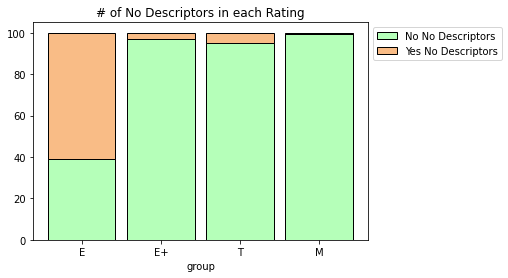

In [83]:
# Data
r = [0,1,2,3]
No_Descriptor = {'E': [201, 512, 830, 473], 'ET': [315, 17, 43, 4]}
df = pd.DataFrame(No_Descriptor)

#From raw value to percentage
totals = [i+j for i,j in zip(df['E'], df['ET'])]
greenBars = [i / j * 100 for i,j in zip(df['E'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['ET'], totals)]
# plot
barWidth = 0.85
names = ('E','E+','T','M')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='black', width=barWidth, label="No No Descriptors")
# Create orange Bars
plt.bar(r, orangeBars,bottom=greenBars, color='#f9bc86', edgecolor='black', width=barWidth, label="Yes No Descriptors")
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# Show graphic
plt.title(label='# of No Descriptors in each Rating')
plt.show()

- No Descriptors has a significant impact on the E ratings

# CONCLUSIONS & RECCOMENDATIONS

- Next steps
    - Research what makes up 'No Descriptors' category to futher analyze its impact on E Rating
    - Explore further correlations and groupings to improve models